In [ ]:
import numpy as np
import gensim.downloader as api
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import ttest_ind

: 

In [5]:
word_vectors = api.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
# WEAT attribute word sets (Gender Bias Example)
male_words = ['man', 'male', 'he', 'brother', 'father', 'son', 'him', 'king', 'uncle', 'sir']
female_words = ['woman', 'female', 'she', 'sister', 'mother', 'daughter', 'her', 'queen', 'aunt', 'madam']



In [ ]:
def get_embedding_vectors(word_list):
    vectors = []
    for word in word_list:
        if word in word_vectors:
            vectors.append(word_vectors[word])
    return np.array(vectors)

def calculate_d(target_vector, attribute_a, attribute_b):
    sim_a = cosine_similarity(target_vector.reshape(1, -1), attribute_a).mean()
    sim_b = cosine_similarity(target_vector.reshape(1, -1), attribute_b).mean()
    return sim_a - sim_b

def calculate_weat(target_x, target_y, attribute_a, attribute_b):

    d_x = np.array([calculate_d(x, attribute_a, attribute_b) for x in target_x])
    d_y = np.array([calculate_d(y, attribute_a, attribute_b) for y in target_y])

    mean_d_x = np.mean(d_x)
    mean_d_y = np.mean(d_y)
    stddev_d_xy = np.std(np.concatenate((d_x, d_y)))

    if stddev_d_xy == 0:
        return 0.0 

    return (mean_d_x - mean_d_y) / stddev_d_xy



In [28]:
# Get embedding vectors
career = ['executive', 'management', 'professional', 'corporation', 'salary', 'office', 'business', 'career']
family = ['home', 'parents', 'children', 'family', 'cousins', 'marriage', 'wedding', 'relatives']
career_vectors = get_embedding_vectors(career)
family_vectors = get_embedding_vectors(family)
male_vectors = get_embedding_vectors(male_words)
female_vectors = get_embedding_vectors(female_words)

# Calculate WEAT score (Corrected order of arguments)
weat_score_career_family = calculate_weat(career_vectors, family_vectors, male_vectors, female_vectors)
print(f"WEAT Score (Gender Bias wrt to Career and Family): {weat_score_career_family:.4f}")



WEAT Score (Gender Bias wrt to Career and Family): 1.5816


In [29]:
professions_male = ["programmer", "engineer", "scientist", "businessman", "athlete", "politician", "ceo", "soldier"]
professions_female = ["nurse", "teacher", "librarian", "secretary", "assistant", "designer", "stylist", "housekeeper"]

# Get embedding vectors
professions_male_vectors = get_embedding_vectors(professions_male)
professions_female_vectors = get_embedding_vectors(professions_female)

weat_score_professions = calculate_weat(professions_male_vectors, professions_female_vectors, male_vectors, female_vectors)
print(f"WEAT Score (Gender Bias wrt to stereotyped profession roles): {weat_score_professions:.4f}")

WEAT Score (Gender Bias wrt to stereotyped profession roles): 1.4249


In [30]:
traits_male = ["strong", "dominant", "assertive", "competitive", "rational", "independent", "courageous", "ambitious"]
traits_female = ["nurturing", "compassionate", "gentle", "sensitive", "emotional", "cooperative", "kind", "graceful"]

traits_male_vectors = get_embedding_vectors(traits_male)
traits_female_vectors = get_embedding_vectors(traits_female)

weat_score_traits = calculate_weat(traits_male_vectors, traits_female_vectors, male_vectors, female_vectors)
print(f"WEAT Score (Gender Bias wrt to stereotyped traits): {weat_score_traits:.4f}")

WEAT Score (Gender Bias wrt to stereotyped traits): 0.6623


In [31]:
hobbies_male = ["football", "basketball", "technology", "cars", "gaming", "weightlifting", "hunting", "fishing"]
hobbies_female = ["cooking", "shopping", "fashion", "dancing", "yoga", "reading", "gardening", "knitting"]

hobbies_male_vectors = get_embedding_vectors(hobbies_male)
hobbies_female_vectors = get_embedding_vectors(hobbies_female)

weat_score_hobbies = calculate_weat(hobbies_male_vectors, hobbies_female_vectors, male_vectors, female_vectors)
print(f"WEAT Score (Gender Bias wrt to stereotyped hobbies): {weat_score_hobbies:.4f}")

WEAT Score (Gender Bias wrt to stereotyped hobbies): 1.6195


In [32]:
pronouns_male = ["he", "him", "his", "himself"]
pronouns_female = ["she", "her", "hers", "herself"]

pronouns_male_vectors = get_embedding_vectors(pronouns_male)
pronouns_female_vectors = get_embedding_vectors(pronouns_female)

weat_score_pronouns = calculate_weat(pronouns_male_vectors, pronouns_female_vectors, male_vectors, female_vectors)
print(f"WEAT Score (Gender Bias wrt to pronouns): {weat_score_pronouns:.4f}")

WEAT Score (Gender Bias wrt to pronouns): 1.9918


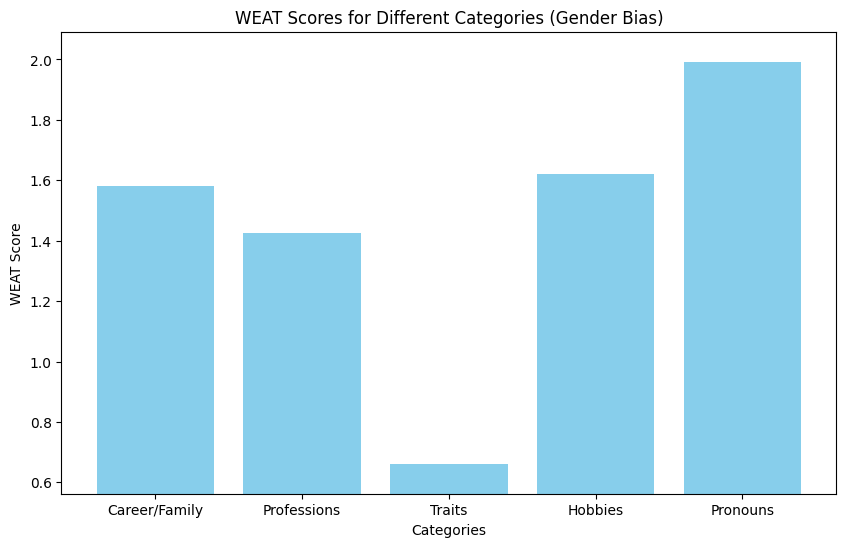

In [33]:
categories = ["Career/Family", "Professions", "Traits", "Hobbies", "Pronouns"]
weat_scores = [weat_score_career_family, weat_score_professions, weat_score_traits, weat_score_hobbies, weat_score_pronouns]

plt.figure(figsize=(10, 6))
plt.bar(categories, weat_scores, color='skyblue')
plt.xlabel("Categories")
plt.ylabel("WEAT Score")
plt.title("WEAT Scores for Different Categories (Gender Bias)")
plt.ylim(min(weat_scores) - 0.1, max(weat_scores) + 0.1) #set y axis range.
plt.show()

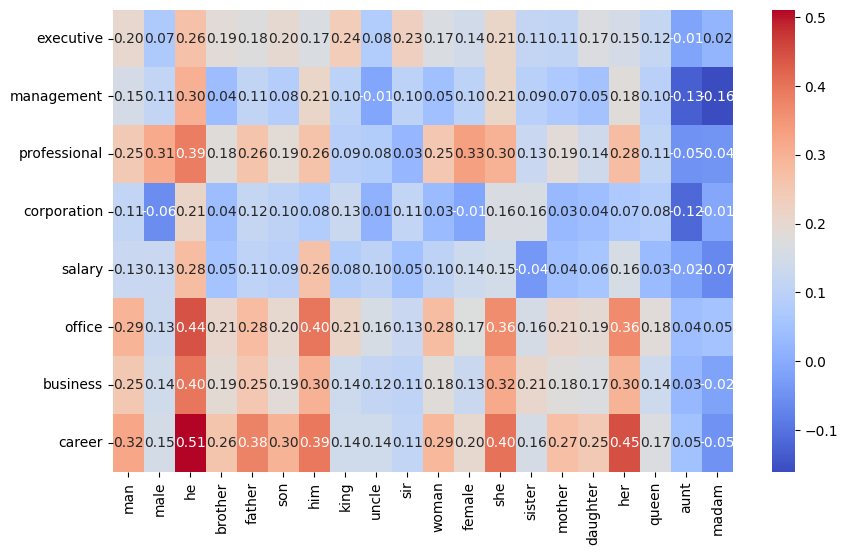

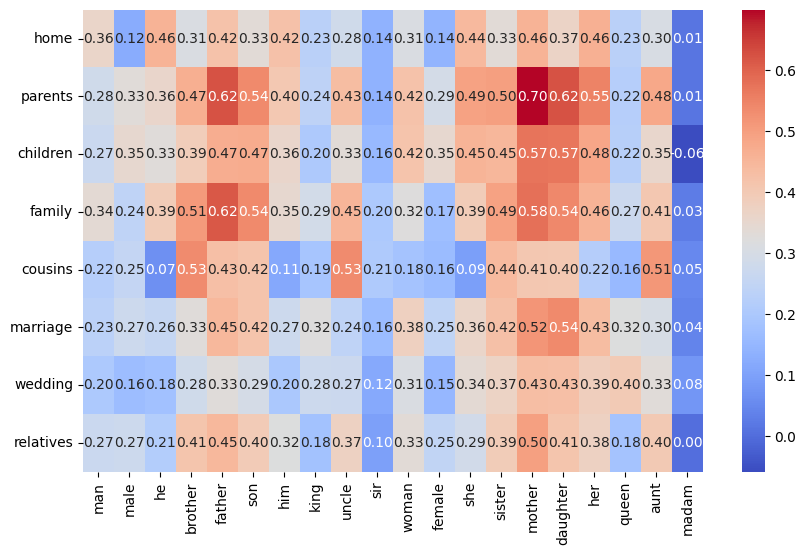

In [20]:
# Heatmap visualization
def plot_heatmap(word_list1, word_list2):
    matrix = np.array([[cosine_similarity(word_vectors[w1].reshape(1,-1), word_vectors[w2].reshape(1,-1))[0][0] for w2 in word_list2] for w1 in word_list1])
    plt.figure(figsize=(10, 6))
    sns.heatmap(matrix, annot=True, xticklabels=word_list2, yticklabels=word_list1, cmap="coolwarm", fmt=".2f")
    plt.show()

plot_heatmap(career, male_words + female_words)
plot_heatmap(family, male_words + female_words)

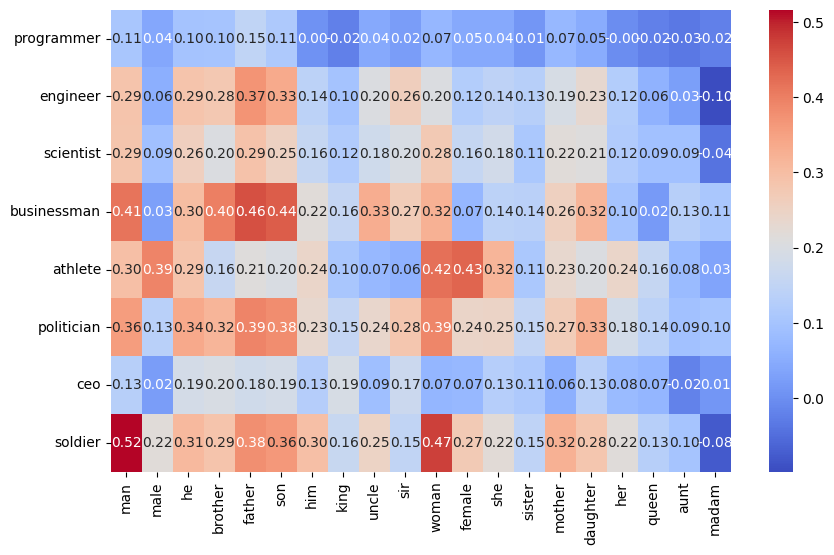

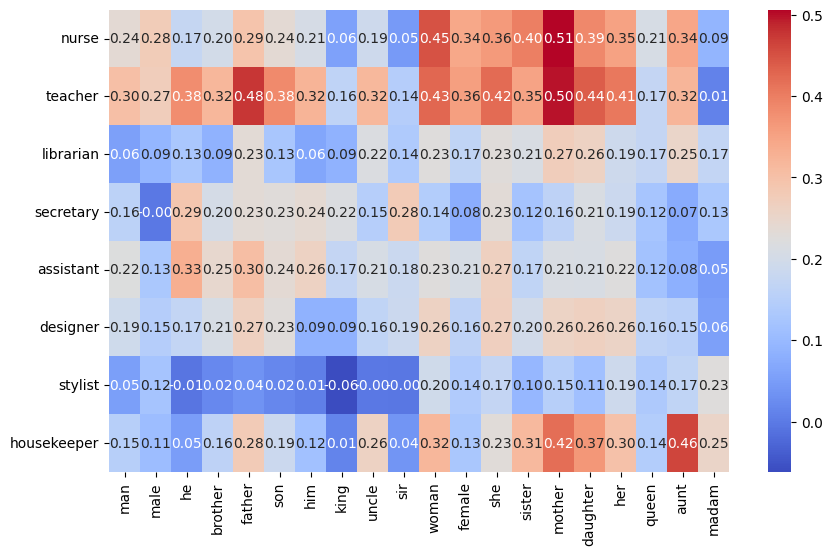

In [34]:
# Heatmap visualization
def plot_heatmap(word_list1, word_list2):
    matrix = np.array([[cosine_similarity(word_vectors[w1].reshape(1,-1), word_vectors[w2].reshape(1,-1))[0][0] for w2 in word_list2] for w1 in word_list1])
    plt.figure(figsize=(10, 6))
    sns.heatmap(matrix, annot=True, xticklabels=word_list2, yticklabels=word_list1, cmap="coolwarm", fmt=".2f")
    plt.show()

plot_heatmap(professions_male, male_words + female_words)
plot_heatmap(professions_female, male_words + female_words)

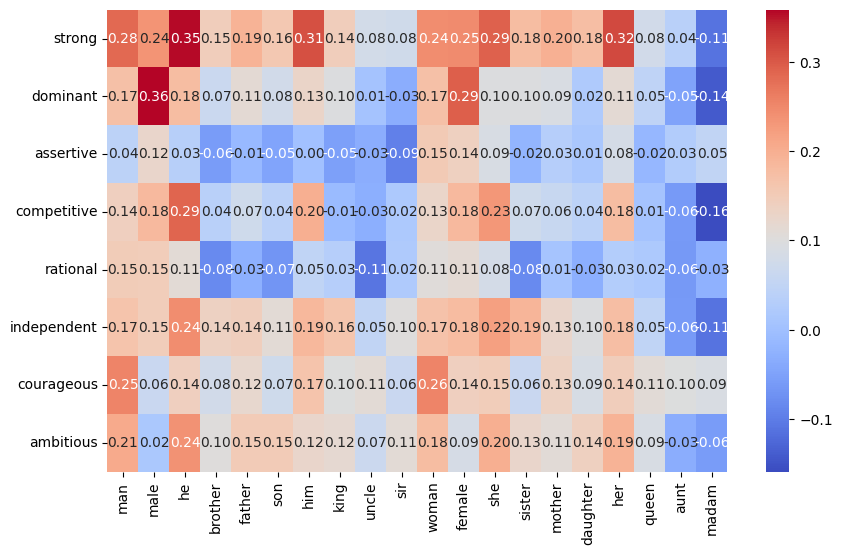

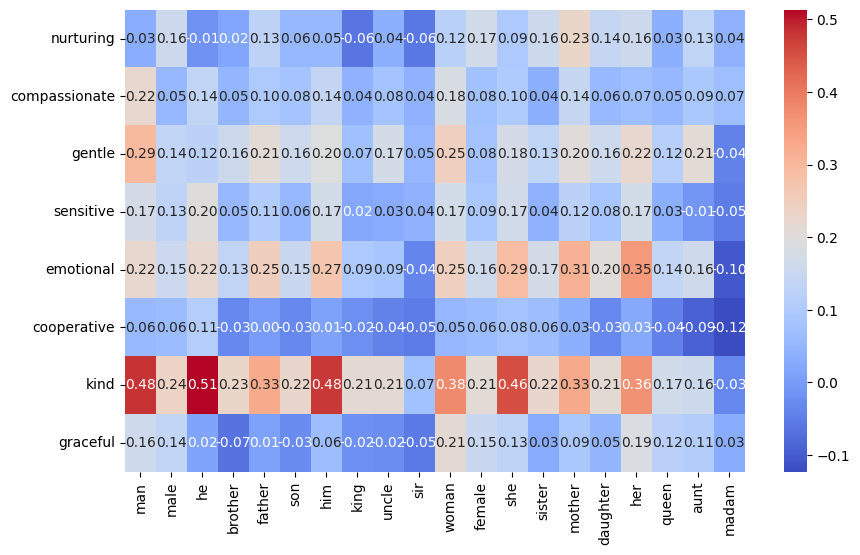

In [35]:
# Heatmap visualization
def plot_heatmap(word_list1, word_list2):
    matrix = np.array([[cosine_similarity(word_vectors[w1].reshape(1,-1), word_vectors[w2].reshape(1,-1))[0][0] for w2 in word_list2] for w1 in word_list1])
    plt.figure(figsize=(10, 6))
    sns.heatmap(matrix, annot=True, xticklabels=word_list2, yticklabels=word_list1, cmap="coolwarm", fmt=".2f")
    plt.show()

plot_heatmap(traits_male, male_words + female_words)
plot_heatmap(traits_female, male_words + female_words)

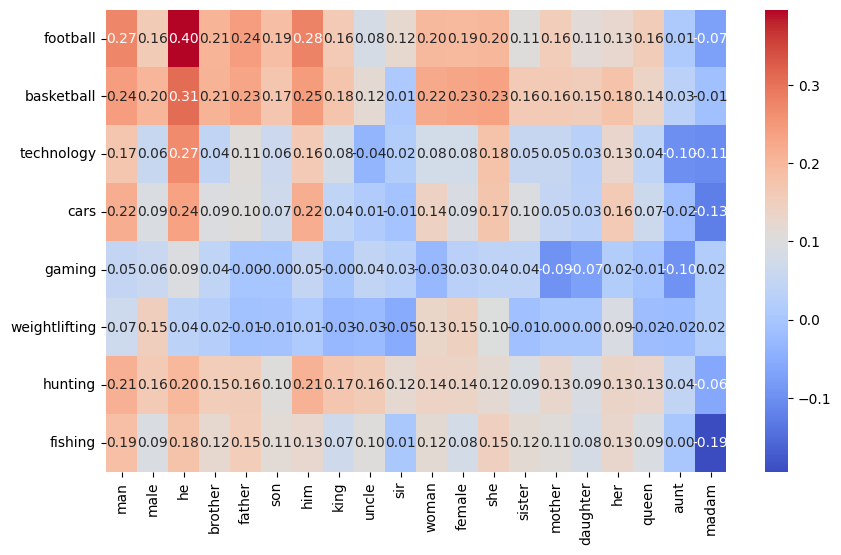

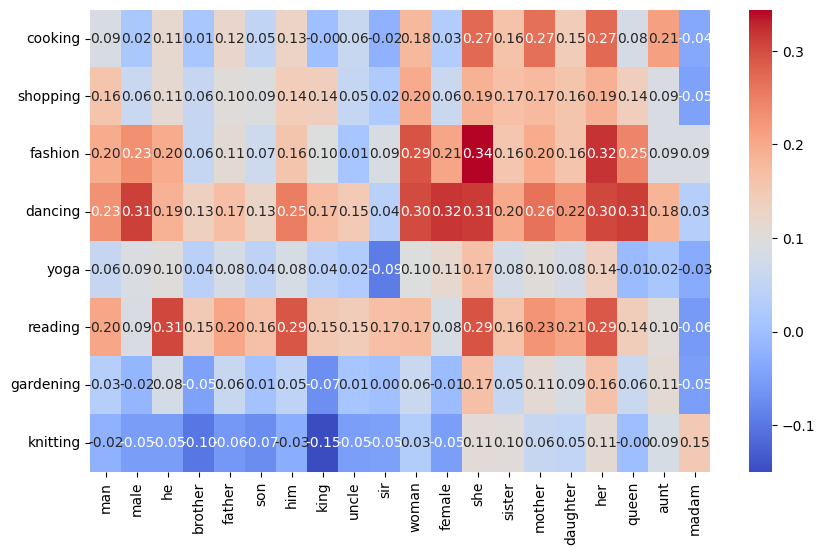

In [36]:
# Heatmap visualization
def plot_heatmap(word_list1, word_list2):
    matrix = np.array([[cosine_similarity(word_vectors[w1].reshape(1,-1), word_vectors[w2].reshape(1,-1))[0][0] for w2 in word_list2] for w1 in word_list1])
    plt.figure(figsize=(10, 6))
    sns.heatmap(matrix, annot=True, xticklabels=word_list2, yticklabels=word_list1, cmap="coolwarm", fmt=".2f")
    plt.show()

plot_heatmap(hobbies_male, male_words + female_words)
plot_heatmap(hobbies_female, male_words + female_words)

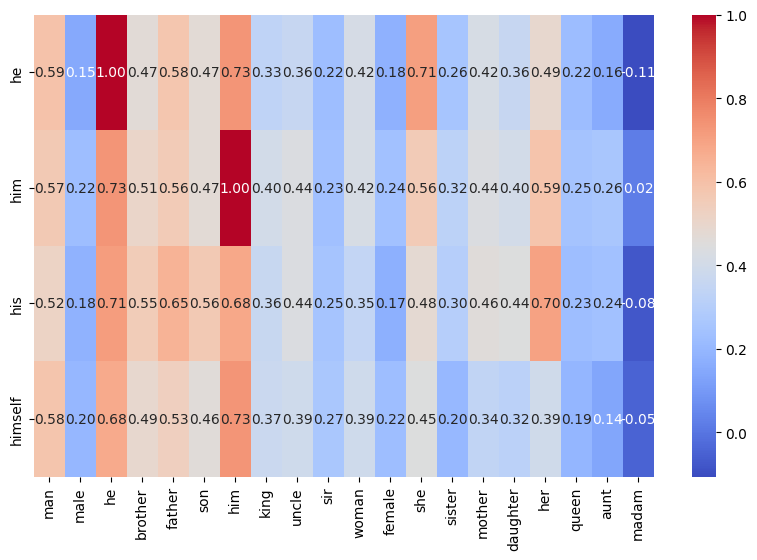

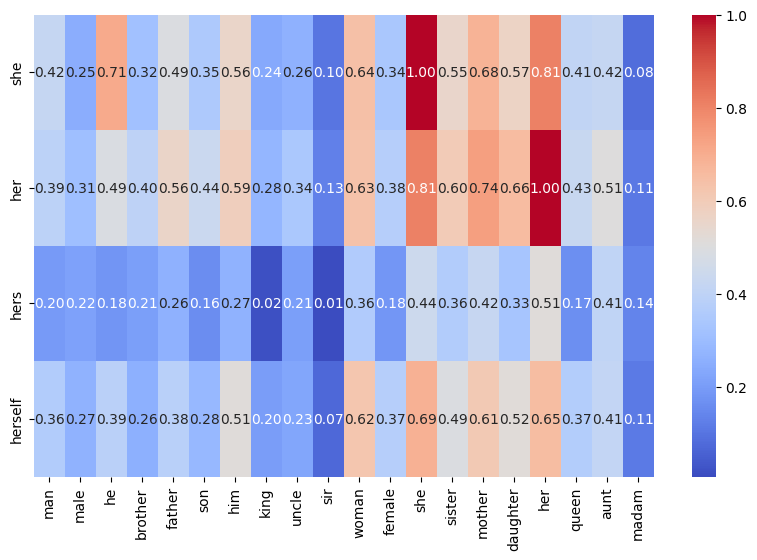

In [37]:
# Heatmap visualization
def plot_heatmap(word_list1, word_list2):
    matrix = np.array([[cosine_similarity(word_vectors[w1].reshape(1,-1), word_vectors[w2].reshape(1,-1))[0][0] for w2 in word_list2] for w1 in word_list1])
    plt.figure(figsize=(10, 6))
    sns.heatmap(matrix, annot=True, xticklabels=word_list2, yticklabels=word_list1, cmap="coolwarm", fmt=".2f")
    plt.show()

plot_heatmap(pronouns_male, male_words + female_words)
plot_heatmap(pronouns_female, male_words + female_words)